In [5]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import kernels, GaussianProcessRegressor

from umda.data import load_data, load_pipeline
from umda.training import get_bootstrap_samples

In [202]:
tmc1_df = load_data(exclude_hydrogen=True)[-1]

In [203]:
embedder = load_pipeline()

/home/kelvin/miniconda3/envs/umda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/miniconda3/envs/umda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator IncrementalPCA from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/miniconda3/envs/umda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KMeans from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kelvin/miniconda3/envs/umda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.24

In [204]:
X = np.asarray([embedder.vectorize(smi) for smi in tmc1_df["SMILES"]])
Y = np.log10(tmc1_df["Column density (cm^-2)"]).values

In [269]:
boot_X, boot_Y = get_bootstrap_samples((X, Y), seed=1295016, n_samples=300)

In [425]:
kernel =  kernels.RationalQuadratic(length_scale_bounds=(1e-1, 1e3), alpha_bounds=(1e-2, 1e1)) + kernels.ConstantKernel()

In [426]:
model = GaussianProcessRegressor(kernel, random_state=215016)

In [427]:
result = model.fit(boot_X, boot_Y)

/home/kelvin/miniconda3/envs/umda/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [428]:
pred_Y, pred_std = model.predict(X, return_std=True)

/home/kelvin/miniconda3/envs/umda/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


(9.5, 15.5)

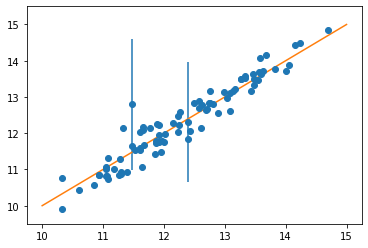

In [429]:
plt.errorbar(Y, pred_Y, fmt="o", yerr=pred_std * 2.)
plt.plot(np.arange(10, 16), np.arange(10, 16),)
plt.ylim([9.5, 15.5])

In [430]:
result.kernel_

RationalQuadratic(alpha=1, length_scale=1) + 1**2